
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Tuesday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ridge and Lasso Regression (15 points)
Use the following codes to import the diabetes dataset.

In [170]:
%matplotlib inline
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

After importing the datasets, use the following code to add additional second-order polynomial and interaction variables to the features matrix.  You should have 65 variables and one target variable. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

PolynomialFeatures class adds the square (2nd degree polynomial) of each feature in the training set as new features. X contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training set

In [171]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (4pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (3pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 65 variables. What do you observe from these coefficients? (3pts)

## Answer

## 1.1 Find best chosen $\lambda$

In [173]:
#perform 5-fold cross validation
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# returns num evenly spaced samples, calculated over the interval [start, stop,num]
# initalizes range of values for our hyperparameters
alphas =  10**np.linspace(10,-2,100)*0.5

#initialize models
lasso = Lasso()
ridge = Ridge()

#initilialize tuning parameters
tuned_parameters = [{'alpha':alphas}]

#define n folds
n_folds = 5

#train lasso scores
lassoclf=GridSearchCV(lasso,tuned_parameters,cv = n_folds,scoring = 'neg_mean_squared_error')
lassoclf.fit(X_train, y_train)
lassoscores = lassoclf.cv_results_['mean_test_score']
lassoscores_std = lassoclf.cv_results_['std_test_score']

#train Ridge scores
ridgeclf=GridSearchCV(ridge,tuned_parameters,cv = n_folds,scoring = 'neg_mean_squared_error')
ridgeclf.fit(X_train, y_train)
ridgescores = ridgeclf.cv_results_['mean_test_score']
ridgescores_std = ridgeclf.cv_results_['std_test_score']

#change to mean squared error (as opposed to neg mean squared error)
lassoscores = np.array(lassoscores) * -1
ridgescores = np.array(ridgescores) * -1

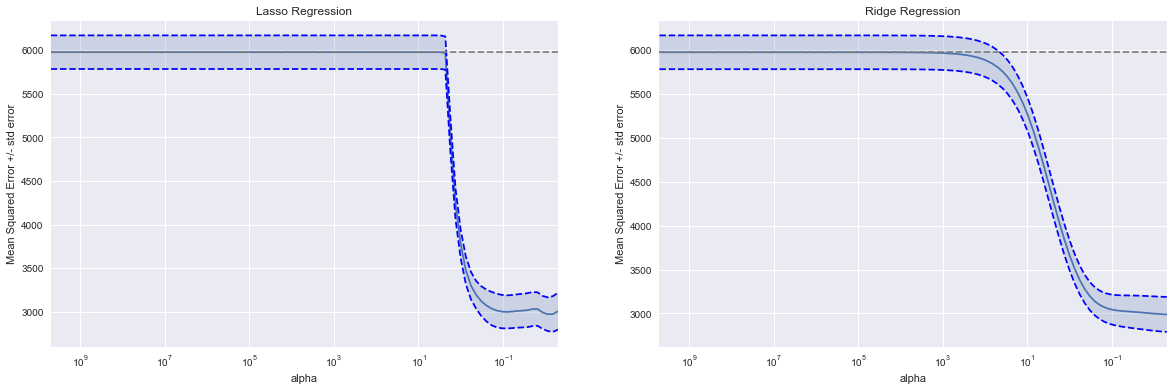

In [174]:
plt.figure().set_size_inches(20,6)

#Lasso plot
plt.subplot(121)
plt.semilogx(alphas, lassoscores)
#plot error lines showing +/- std errors of the scores 
lassostd_error = lassoscores_std/np.sqrt(n_folds)
plt.semilogx(alphas, lassoscores + lassostd_error, 'b--')
plt.semilogx(alphas, lassoscores - lassostd_error, 'b--')
# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, lassoscores + lassostd_error, lassoscores - lassostd_error, alpha=0.2)
plt.ylabel('Mean Squared Error +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(lassoscores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.title('Lasso Regression')

#Ridge plot
plt.subplot(122)
plt.semilogx(alphas, ridgescores)
#plot error lines showing +/- std errors of the scores 
ridgestd_error = ridgescores_std/np.sqrt(n_folds)
plt.semilogx(alphas, ridgescores + ridgestd_error, 'b--')
plt.semilogx(alphas, ridgescores - ridgestd_error, 'b--')
# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, ridgescores + ridgestd_error, ridgescores - ridgestd_error, alpha=0.2)
plt.ylabel('Mean Squared Error +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(ridgescores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.title('Ridge Regression')

In [175]:
import math
lassoAlpha = alphas[np.argmin(lassoscores)]
ridgeAlpha = alphas[np.argmin(ridgescores)]

print "Best alpha for lasso: ", '10^%f' % math.log10(lassoAlpha)
print "Best alpha for ridge: ", '10^%f' % math.log10(ridgeAlpha)

Best alpha for lasso:  10^-2.058606
Best alpha for ridge:  10^-2.301030


## 1.2 Plot coefficients of features for Ridge and Lasso
Source: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

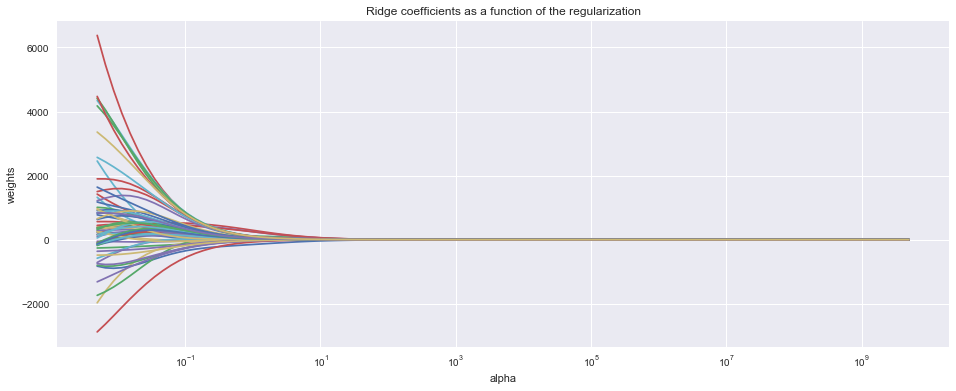

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# #############################################################################
# Attributes

labels = ['Age','Sex', 'BMI', 'Avg Blood Pressure', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

# #############################################################################
# Compute paths

# returns num evenly spaced samples, calculated over the interval [start, stop,num]
# initalizes range of values for our hyperparameters
alphas =  10**np.linspace(10,-2,100)*0.5

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

plt.figure(figsize=(16,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

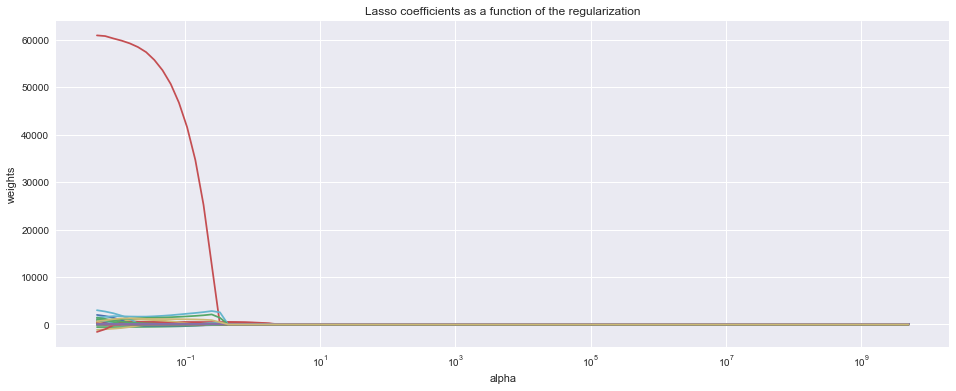

In [177]:
#https://stackoverflow.com/questions/31290976/sklearn-how-to-get-coefficients-of-polynomial-features
# #############################################################################
# Attributes

labels = ['Age','Sex', 'BMI', 'Avg Blood Pressure', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

# #############################################################################
# Compute paths

# returns num evenly spaced samples, calculated over the interval [start, stop,num]
# initalizes range of values for our hyperparameters
alphas =  10**np.linspace(10,-2,100)*0.5

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results

plt.figure(figsize=(16,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

###  Observation of coefficients as a function of the regularization

*Similarities:* As alpha approaches $\infty$, the weights of the coefficients decreases and approaches 0 for both Ridge and Lasso Regression. At very low values, the features still each hold a lot of weight. (This is especially true for Ridge according to the charts above).

*Differences:* However, we see that Lasso coefficients approaches zero a lot faster due to the penalty given on the feautures from the $l_1$ norm. Meanwhile, Ridge coefficients approaches zero, at a much slower rate.

From the qualitiative observation, we also see the Age holds the most weight in relation to diabetes. This is seen especially in the weights of coefficients provided by Lasso Regression



## 1.3  MSE of 3 Different Models

Note to self: LSE is a method that builds a model and MSE is a metric that evaluate your model's performances.

In [178]:
# #############################################################################
# Initialize Models

lin = LinearRegression()
ridge = Ridge(alpha = ridgeAlpha)
lasso = Lasso(alpha  = lassoAlpha)

# Least Squares
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
linmse = ((lin_pred - y_test) ** 2).mean()
print "Least Square Linear Regression MSE: " + str(linmse)

# Ridge
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridgemse = ((ridge_pred - y_test) ** 2).mean()
print "Least Square Ridge Regression MSE: " + str(ridgemse)

# Lasso
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lassomse = ((lasso_pred - y_test) ** 2).mean()
print "Least Square Lasso Regression MSE: " + str(lassomse)

Least Square Linear Regression MSE: 3501.51672513
Least Square Ridge Regression MSE: 2946.79477072
Least Square Lasso Regression MSE: 2961.43759012


## 1.4 LassoCV to find $\lambda$

In [179]:
lassoCV = LassoCV(alphas=None, cv=10, max_iter=10000)
lassoCV.fit(X_train, y_train)

print "Best alpha from LassoCV: ", '10^%f' % lassoCV.alpha_

Best alpha from LassoCV:  10^0.006421


In [180]:
# Run this on Lasso
lasso = Lasso(alpha  = lassoCV.alpha_)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lassomse = ((lasso_pred - y_test) ** 2).mean()

print "Least Square Lasso Regression MSE: " + str(lassomse)

Least Square Lasso Regression MSE: 2971.81006562


In [181]:
# Look at coefficients at this singe hyperparameter
import pandas as pd
print pd.Series(lasso.coef_).sort_values(ascending=False)

11    2527.811727
18    1554.851419
36     875.450075
61     875.268858
8      817.158342
5      726.913837
30     724.095066
29     664.164437
2      546.984638
53     546.680659
22     496.504509
40     374.647620
55     369.983547
3      348.238823
37     151.458509
38      66.593847
64      54.676438
6       31.984626
9        5.940870
15      -0.000000
10       0.000000
28       0.000000
27       0.000000
25       0.000000
24       0.000000
23       0.000000
17       0.000000
12       0.000000
13       0.000000
21       0.000000
         ...     
31       0.000000
48       0.000000
62      -0.000000
60      -0.000000
59      -0.000000
58       0.000000
57       0.000000
56      -0.000000
54       0.000000
52      -0.000000
51      -0.000000
50      -0.000000
63       0.000000
49       0.000000
47      -0.000000
46       0.000000
45       0.000000
44       0.000000
43      -0.000000
42       0.000000
41      -0.000000
39       0.000000
35       0.000000
34       0.000000
33       0

In [182]:
nonZeroCoef = len(lasso.coef_.nonzero()[0])

print "Of the 64 features from Polynomial Regression, only", nonZeroCoef, "were useful"

Of the 64 features from Polynomial Regression, only 24 were useful


###  Observation of LassoCV effect on coefficients

A hyperparemter of 10^0.006421 yielded 25 nonzero coeffs (relevant features). The other features were zeroed out by the l1 norm of Lasso Regression 

# Question 2  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer

Polynomial Regression is used to fit more complex model to fit non-linear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data:

1. A simpler model would be preferred when you have less features. (i.e 2). It would be more reasonable to fit a linear model on a dataset with fewer features to avoid overfitting. In other words, if you know your model is linear, use linear. Overall, linear regression would be used for better interpretatbility.

2. Linear Regression might be more beneificial if you want to find the correlation between 2 variables to see how related they are to one another.

# Question 3 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

A model with high dimensionality is likely to have high variance, and thus will overfit the training data.

K-nearest neighbor reduces dimensionality by grouping instances that are close to each other.


As a result, the larger the K value, the higher the bias and smaller the variance. Unfortunately, grouping with a large K value will result in a generalization error and underfit the data.

Meanwhile, a smaller K value will keep the data at a higher dimension and will increase susceptibility to overfitting. This is described as lower bias but higher variance

# Question 4: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 2 scatterplots of "rent" against "demo_score", and "inst" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

## 4.1 Boxplots and Scatterplot

In [183]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [184]:
df = pd.read_csv("russett_full_v2.csv")
df.head()

,country,gini,farm,rent,gnpr,labo,inst,ecks,death,demo_class,demo_score
0,Argentina,86.3,98.2,47.9,374,25,16.6,47.0,217,2,35
1,Australia,92.9,99.6,30.0,1215,14,19.3,0.0,0,1,89
2,Austria,74.0,97.4,25.7,532,32,15.8,4.0,0,2,52
3,Belgium,58.7,85.8,98.3,1015,10,23.5,8.0,1,1,98
4,Bolivia,93.8,97.7,35.0,66,72,18.3,43.0,663,3,19


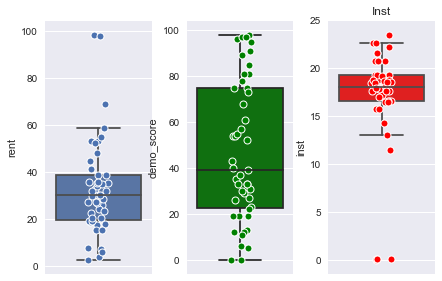

In [185]:
# reference http://seaborn.pydata.org/tutorial/categorical.html

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.tight_layout(pad=0.7)

#Rent
plt.title("Rent")
sns.boxplot(y= df['rent'],data =df, ax = ax1)
sns.stripplot(y=df['rent'], jitter = True, ax = ax1);

#Democracy
plt.title("Democracy Score")
sns.boxplot(y= df['demo_score'], data =df, color = 'g', ax = ax2)
sns.stripplot(y=df['demo_score'], jitter = True, color = 'g', ax = ax2);

#Inst
plt.title("Inst")
sns.boxplot(y= df['inst'], data =df, color = 'r', ax = ax3)
sns.stripplot(y=df['inst'], jitter = True, color = 'r', ax = ax3);

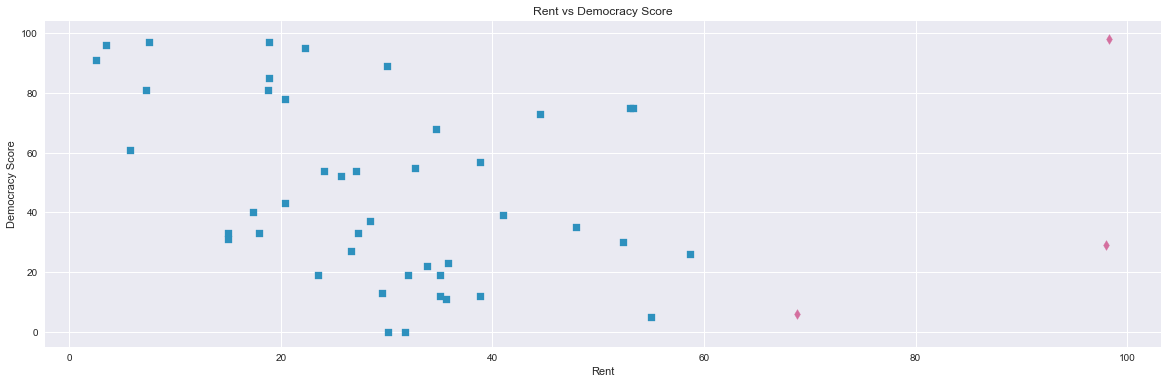

In [194]:
#Scatterplots
#source https://stackoverflow.com/questions/40333033/how-to-change-outliers-to-some-other-colors-in-a-scatter-plot

#Outliers defined as rent > 60 as seen in boxpplot
#Rent vs Democracy score
plt.figure(figsize=(20,6))
plt.xlabel('Rent')
plt.ylabel('Democracy Score')
plt.title('Rent vs Democracy Score')
nonoutLiers = df[df['rent']<=60]
outLiers = df[df['rent'] > 60]
plt.scatter(nonoutLiers['rent'],nonoutLiers['demo_score'],marker = "s",color="#2e91be")
plt.scatter(outLiers['rent'],outLiers['demo_score'],marker = "d",color="#d46f9f")



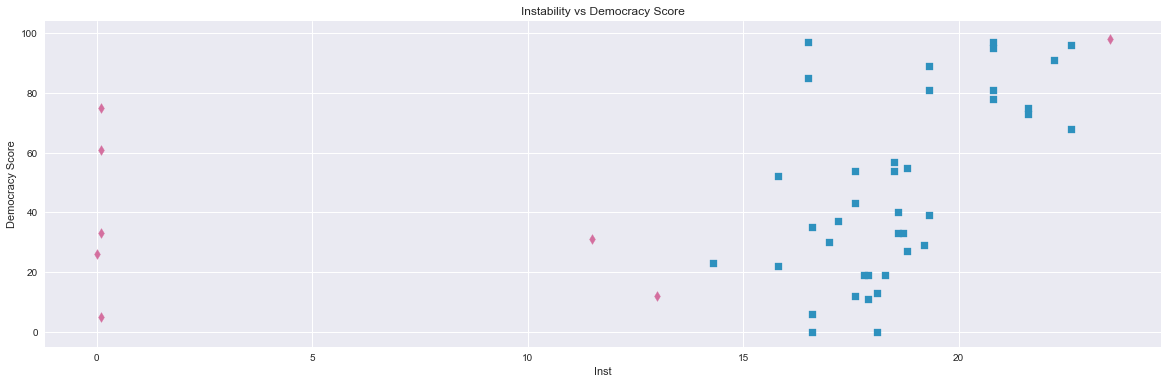

In [196]:
#Inst vs Democracy score
plt.figure(figsize=(20,6))
plt.xlabel('Inst')
plt.ylabel('Democracy Score')
plt.title('Instability vs Democracy Score')
nonoutLiers = df[(df['inst'] >=14) & (df['inst']<=23)]
outLiers = df[(df['inst'] <14) | (df['inst'] > 23)]
plt.scatter(nonoutLiers['inst'],nonoutLiers['demo_score'],marker = "s",color="#2e91be")
plt.scatter(outLiers['inst'],outLiers['demo_score'],marker = "d",color="#d46f9f")

### Observation: How would inclusion of outlier affect democracy score?

The inclusion of outliers will negatively impact models predicitng our democracy score (especially in Instability vs Democracy Score)
Taking a look above in the graph, the instability of 0 leads to a distribution of democracy scores that will skew the data.

There is a negative correlation of rent to democracy score and positive correlation between instability and democracy score. 
A linear model using the data set (inclusive of outliers), will result in a poor prediction


##4.2 MLR using Linear Regression

In [187]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("russett_full_v2.csv")
X = df.filter(items = ['rent','inst','ecks'])
y = df['demo_score']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)   


In [197]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#use linear regression with just 3 variables

#train model
lin = LinearRegression()
lin.fit(X_train, y_train)

#predict on X_train (overfit)
y_predicted_lin = lin.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_predicted_lin))

print "Linear Regression RMSE when scoring on X_train: ", rmse


#predict on X_test
y_predicted_lin = lin.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_predicted_lin))


print "Linear Regression RMSE when scoring on X_test: ", linmse


Linear Regression RMSE when scoring on X_train:  25.559001845
Linear Regression RMSE when scoring on X_test:  3501.51672513


### Observation of MSE from Training to Test:
The RMSE when scoring on X_train was 25 while the RMSE on X_test was 3501.

We see that linear regression does well (overfits) when simply predicitng on the training set but is a poor predictor elsewise

## 4.3 Robust model with Huber Loss

In [198]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(alpha = 0.0)
huber.fit(X_train,y_train)
huber_pred = huber.predict(X_test)
hubermse = sqrt(mean_squared_error(y_test, huber_pred))

print "RMSE using Huber Regressor: ", hubermse

RMSE using Huber Regressor:  30.9543526403


## 4.4 Comparing models
Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general?

**Least Square Linear Regression:** Using this model, the RMSE on the training test was 3501 (pretty horrendous prediction)

**Huber Regression:** Huber Regression ignores outliers in a data set, and creates a linear model accordingly. The result was a RMSE of 30.95

Outliers poorly impact the performance of ordinary least squares regression but is ignored on robust regression with Huber loss

(array([ 2.,  1.,  2.,  0.,  1.,  1.,  3.,  1.,  0.,  1.]),
 array([-42.36746629, -31.86296328, -21.35846026, -10.85395725,
         -0.34945423,  10.15504879,  20.6595518 ,  31.16405482,
         41.66855783,  52.17306085,  62.67756386]),
 <a list of 10 Patch objects>)

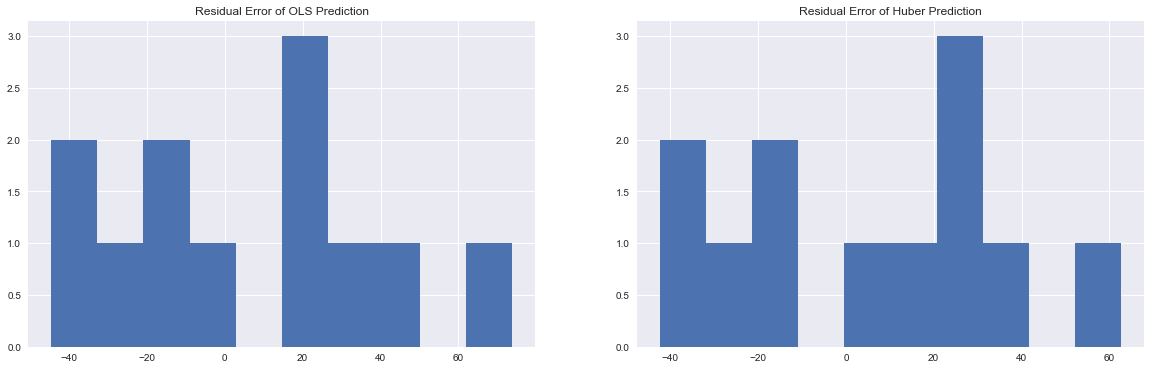

In [208]:
plt.figure().set_size_inches(20,6)
# plot residual error of OLS Regression
plt.subplot(121)
residual_error_lin = y_test - y_predicted_lin
plt.title("Residual Error of OLS Prediction")
plt.hist(residual_error_lin)

# plot residual error of Huber Regresssion
plt.subplot(122)
plt.title("Residual Error of Huber Prediction")
residual_error_huber = y_test - huber_pred
plt.hist(residual_error_huber)

From the residual plots of Ordinary least square prediction and Huber prediction, we see that the shape of the distribution appears gaussian and (relatively) centered at zero. (with Huber performing better and being centered at zero). 

As a result, MLR is a reasonable model for this data set.

# Question 5 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$± 0.02), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

Minimum sample size needed is:

$$n \geq p(1-p)(z_{\alpha/2}/\epsilon)^2$$

Normals:

$ \alpha = .1$ : $$z_{\alpha/2} +/- 1.65 \delta$$
$ \alpha = .05$ : $$z_{\alpha/2} +/- 1.96 \delta$$
$ \alpha = .01$ : $$z_{\alpha/2} +/- 2.58 \delta$$

![](http://i.markdownnotes.com/image_CQCOxr8.png)

## 5.1 Minimum value of n needed:

### (i) $p = 0.5$

$$n = 0.5(1 - 0.5)(1.65/0.03)^2 $$

$ n = 757 $, 757 samples needed to determine that a user has 50% chance of liking the show with 90% confidence and only 3% margin of error

### (ii) $p = 0.25$

$$n = 0.25(1 - 0.25)(1.65/0.03)^2 $$

$ n = 738 $, 738 samples needed to determine that a user has 25% chance of liking the show with 90% confidence and only 3% margin of error

## 5.2 Obtaining a more accurate answer:
### (i) Change $\alpha = 0.02$ to $\alpha = 0.01$

Step 1) Solve for p
$$\frac{p(1-p)(z_{2.33}/\epsilon)^2}{p(1-p)(z_{2.575}/\epsilon)^2} = \frac{1000}{\hat{n}} $$

This yields 
$$\frac{2.33}{2.575} = \frac{\sqrt{1000}}{\sqrt{\hat{n}}} $$

Solve for new sample size

$$\hat{n} = 1222 $$

We will now need a sample of 1221 instead of 1000 to increase our confidence by 1%

### (i) Change $\alpha = 0.02$ to $\alpha = 0.05$ but decrease $ \epsilon = \epsilon/2$

Modifying above formulas:
$$\frac{2.33}{1.96/0.5} = \frac{\sqrt{1000}}{\sqrt{\hat{n}}} $$

Solve for n:

$$\hat{n} = 2831 $$

We will now need a sample of 2831 instead of 1000 to decrease our margin of error by a factor of 2 (while also decreasing our confidence by 5%)

# Question 6 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [52]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [53]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively.  (This is called Principal Components Regression). Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

In [54]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
# https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
pca = PCA(n_components=44)

In [10]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=44, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

In [26]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

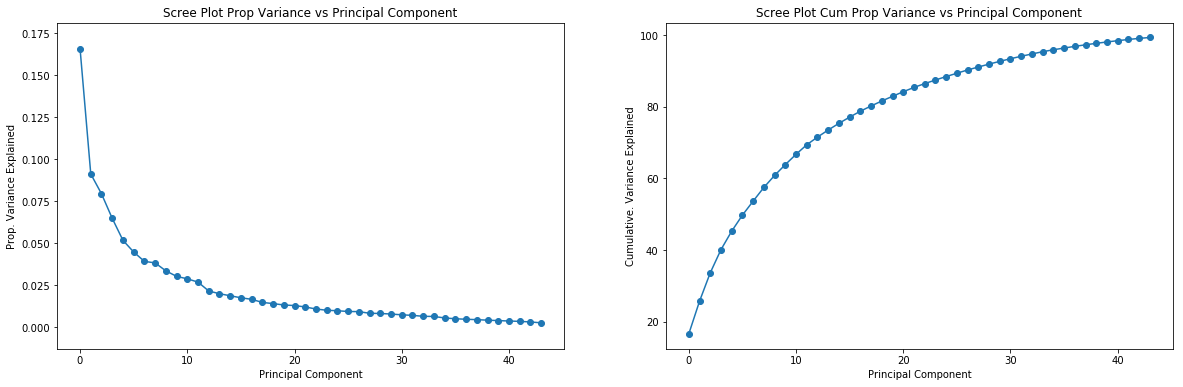

In [25]:
xVals = [n for n in range(0,44)]

plt.figure().set_size_inches(20,6)
plt.subplot(121)
plt.scatter(xVals,var)
plt.plot(var)
plt.title('Scree Plot Prop Variance vs Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')

plt.subplot(122)
plt.scatter(xVals,var1)
plt.plot(var1)
plt.title('Scree Plot Cum Prop Variance vs Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative. Variance Explained')

## 5.2 30%, 60%, 90%

In [46]:
thirty = xVals[np.argwhere((var1 > 30) & (var1 < 35))[0][0]]
sixty = xVals[np.argwhere((var1 >= 60) & (var1 < 61))[0][0]]
ninety = xVals[np.argwhere((var1 >= 90) & (var1 < 91))[0][0]]

print "Number of components needed to capture 30% of data:", thirty
print "Number of components needed to capture 60% of data:", sixty
print "Number of components needed to capture 90% of data:", ninety

Number of components needed to capture 30% of data: 2
Number of components needed to capture 60% of data: 8
Number of components needed to capture 90% of data: 26


## 5.3 Fit linear regression on N1, N2, N3

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge, LinearRegression 
N1 = 2
N2 = 8
N3 = 26




#30% variance captured and data split
pca = PCA(n_components=2)
thirtyPercentData = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(thirtyPercentData,y,test_size = 0.33, random_state=20)

#fit model
linear = LinearRegression()
linear.fit(X_train,y_train)
ypred = linear.predict(X_test)
linmse = ((ypred - y_test) ** 2).mean()
print "MSE of Linear Regression of PCA of n=2 components capturing 30%:", linmse

#60% variance captured and data split 
pca = PCA(n_components=8)
sixtyPercentData = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(sixtyPercentData,y,test_size = 0.33, random_state=20)
linear = LinearRegression()
linear.fit(X_train,y_train)
ypred = linear.predict(X_test)
linmse = ((ypred - y_test) ** 2).mean()
print "MSE of Linear Regression of PCA of n=8 components capturing 60%:", linmse


#90% variance captured and data split 
pca = PCA(n_components=26)
ninetyPercentData = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(ninetyPercentData,y,test_size = 0.33, random_state=20)
linear = LinearRegression()
linear.fit(X_train,y_train)
ypred = linear.predict(X_test)
linmse = ((ypred - y_test) ** 2).mean()
print "MSE of Linear Regression of PCA of n=26 components capturing 90%:", linmse

#Original data set
# Least Squares
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)
linear.fit(X_train, y_train)
lin_pred = linear.predict(X_test)
linmse = ((lin_pred - y_test) ** 2).mean()
print "Least Square Linear Regression MSE: " + str(linmse)

MSE of Linear Regression of PCA of n=2 components capturing 30%: 5860.65663725
MSE of Linear Regression of PCA of n=8 components capturing 60%: 3916.84420427
MSE of Linear Regression of PCA of n=26 components capturing 90%: 3030.431801
Least Square Linear Regression MSE: 3424.65140859


### Observation
As the number of components increases, the lower the MSE.

We recognize that LassoCV also deemed that 26 features were important and we also have n=26 for PCA.

Reducing the dimensionality to capture 90% of the data results in a better predictive model than performing linear regression on the original dataset